# Results from edge testing

## Libraries

In [1]:
library(readr)
library(dplyr, warn.conflicts = FALSE)
library(tidyr)
library(purrr)
library(ggplot2)

## Plot resolution

In [2]:
options(repr.plot.res = 300)

## Working directory

In [3]:
projfold <- "/Users/da1078co/Documents/Lund/PhD/Projects/BN"

## Table of edges tested

In [13]:
edge_table_totest <- read_tsv(
  file.path(projfold, "data", "edge_table_totest.tsv"),
  show_col_types = FALSE
)
head(edge_table_totest)

node1,node2,atype,CHROM,start,end
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
AGRP,CD4,SMRHEIDI,16,67516474,67517450
AGRP,Glucose,SMRHEIDI,16,67516474,67517450
AGRP,TG,SMRHEIDI,16,67516474,67517450
APOM,HDL,SMRHEIDI,6,31620193,31625987
APOM,TG,SMRHEIDI,6,31620193,31625987
BasalISR,GlucoseSens,IVWMR,NA,NA,NA


## Importing results

In [14]:
edge_table_results <- edge_table_totest |>
  mutate(
    RESOBJ = map2(
      node1, node2,
      ~read_rds(
        file.path(
          projfold, "data", "EdgeTests",
          paste0(.x, "_", .y, ".rds")
        )
      )
    )
  )
print(edge_table_results)

# A tibble: 124 x 7
   node1    node2       atype    CHROM    start      end RESOBJ          
   <chr>    <chr>       <chr>    <dbl>    <dbl>    <dbl> <list>          
 1 AGRP     CD4         SMRHEIDI    16 67516474 67517450 <named list [3]>
 2 AGRP     Glucose     SMRHEIDI    16 67516474 67517450 <named list [3]>
 3 AGRP     TG          SMRHEIDI    16 67516474 67517450 <named list [3]>
 4 APOM     HDL         SMRHEIDI     6 31620193 31625987 <named list [3]>
 5 APOM     TG          SMRHEIDI     6 31620193 31625987 <named list [3]>
 6 BasalISR GlucoseSens IVWMR       NA       NA       NA <named list [3]>
 7 BasalISR HDL         IVWMR       NA       NA       NA <named list [3]>
 8 BasalISR HOMA_IR     IVWMR       NA       NA       NA <named list [3]>
 9 BasalISR IGFBP1      IVWMR       NA       NA       NA <named list [3]>
10 BasalISR Insulin     IVWMR       NA       NA       NA <named list [3]>
# i 114 more rows


## IVW-MR results

In [53]:
ivwmr_res <- edge_table_results |>
  filter(atype == "IVWMR") |>
  transmute(
    node1, node2,
    resdf = map(RESOBJ, "resdf"),
    failure = map_chr(RESOBJ, "failure")
  ) |>
  unnest(resdf, keep_empty = TRUE)
head(ivwmr_res)

node1,node2,BETA_IVW,SE_IVW,BETA_Egger,SE_Egger,B0_Egger,B0SE_Egger,PVAL_IVW,QDF_IVW,QSTAT_IVW,QPVAL_IVW,PVAL_Egger,PVAL_B0Egger,QSTAT_Egger,QPVAL_Egger,failure
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
BasalISR,GlucoseSens,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NoValidIns
BasalISR,HDL,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NoValidIns
BasalISR,HOMA_IR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NoValidIns
BasalISR,IGFBP1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NoValidIns
BasalISR,Insulin,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NoValidIns
BasalISR,LEP,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NoValidIns


### Top hits

In [55]:
ivwmr_res |>
  filter(PVAL_IVW < 0.01, PVAL_B0Egger > 0.01)

node1,node2,BETA_IVW,SE_IVW,BETA_Egger,SE_Egger,B0_Egger,B0SE_Egger,PVAL_IVW,QDF_IVW,QSTAT_IVW,QPVAL_IVW,PVAL_Egger,PVAL_B0Egger,QSTAT_Egger,QPVAL_Egger,failure
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
GlucoseSens,TwoGlucose,-0.3778016,0.08658913,-0.09772932,0.34798705,-2.343968e-02,0.0281959101,1.282011e-05,25,349.57680,5.921153e-59,7.788317e-01,0.40579576,339.79241,1.495420e-57,None
GlucoseSens,TwoInsulin,-0.1136843,0.03903676,0.13156737,0.14757355,-2.110891e-02,0.0122826222,3.588506e-03,25,74.49777,8.094330e-07,3.726408e-01,0.08568731,66.33427,7.740310e-06,None
HDL,HMOX1,0.2596590,0.01821216,0.27943164,0.02778461,-5.057991e-04,0.0005367581,4.029232e-46,1905,4377.64878,1.781124e-195,8.551002e-24,0.34602775,4375.60812,2.091128e-195,None
HDL,KITLG,0.4279042,0.02262080,0.44308321,0.03346147,-4.093801e-04,0.0006649114,8.357105e-80,1916,7179.14960,0.000000e+00,5.046668e-40,0.53809834,7177.72876,0.000000e+00,None
HDL,TG,-0.4668793,0.01413778,-0.42494337,0.02198839,-1.021248e-03,0.0004105072,3.733666e-239,1915,81968.38027,0.000000e+00,3.258778e-83,0.01285467,81704.18627,0.000000e+00,None
HbA1c,HMOX1,-0.7562603,0.10530194,-0.79411882,0.20172554,7.012788e-04,0.0031827088,6.878620e-13,128,525.11552,1.603325e-49,8.263387e-05,0.82560619,524.91485,8.474495e-50,None
PancFat,VAT,0.1355421,0.04774186,0.52606486,0.26878888,-2.535291e-02,0.0172017553,4.524621e-03,10,20.11747,2.816096e-02,5.032777e-02,0.14052034,16.20598,6.270286e-02,None
TG,AGRP,0.6004209,0.01504190,0.60295572,0.02276487,-6.591698e-05,0.0004442515,0.000000e+00,1699,2379.26517,1.123701e-25,1.396609e-154,0.88204476,2379.23432,9.520201e-26,None
HDL,APOM,0.4649855,0.01821590,0.44969577,0.02792748,3.879255e-04,0.0005370429,1.005484e-143,1912,4449.09493,5.120696e-203,2.459327e-58,0.47008780,4447.88051,4.744904e-203,None


### Saving

In [56]:
write_tsv(
  ivwmr_res,
  file.path(projfold, "data", "ivwmr_res.tsv")
)

## SMR-HEIDI results

In [57]:
smrheidi_res <- edge_table_results |>
  filter(atype == "SMRHEIDI") |>
  transmute(
    node1, node2,
    resdf = map(RESOBJ, "resdf"),
    failure = map_chr(RESOBJ, "failure")
  ) |>
  unnest(resdf, keep_empty = TRUE)
head(smrheidi_res)

node1,node2,CHROM,POS,RSID,EA,NEA,EAF_EXP,BETA_EXP,SE_EXP,...,EAF_OUT,BETA_OUT,SE_OUT,PVAL_OUT,beta_smr,se_smr,pval_smr,pval_heidi,nsnp_heidi,failure
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AGRP,CD4,16,67475802,rs77115810,G,A,0.984698,0.259008,0.0301088,...,0.9847965,-0.040638600,0.03008010,0.176691,-0.156900945,0.117559310,0.181989778,2.956012e-01,6,None
AGRP,Glucose,16,67475802,rs77115810,G,A,0.984698,0.259008,0.0301088,...,0.9820000,0.010600000,0.00960000,0.459500,0.040925377,0.037368567,0.273436967,6.629666e-01,6,None
AGRP,TG,16,67475802,rs77115810,G,A,0.984698,0.259008,0.0301088,...,0.9864000,0.018400000,0.00580000,0.001514,0.071040277,0.023867342,0.002915936,8.376875e-02,6,None
APOM,HDL,6,31633552,rs805258,C,T,0.970408,0.784462,0.0217097,...,0.9559000,-0.005200000,0.00310000,0.087020,-0.006628747,0.003956009,0.093813658,4.502747e-03,20,None
APOM,TG,6,31633552,rs805258,C,T,0.970408,0.784462,0.0217097,...,0.9568000,0.002700000,0.00310000,0.389100,0.003441849,0.003952901,0.383909873,4.471731e-09,20,None
CD4,CTRC,12,6896546,rs73053728,A,G,0.697681,0.359292,0.0080763,...,0.6977240,-0.000966975,0.00751418,0.897605,-0.002691335,0.020913940,0.897605989,7.803992e-01,20,None


### Top hits

In [58]:
smrheidi_res |>
  filter(pval_smr < 0.01, pval_heidi > 0.01)

node1,node2,CHROM,POS,RSID,EA,NEA,EAF_EXP,BETA_EXP,SE_EXP,...,EAF_OUT,BETA_OUT,SE_OUT,PVAL_OUT,beta_smr,se_smr,pval_smr,pval_heidi,nsnp_heidi,failure
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AGRP,TG,16,67475802,rs77115810,G,A,0.984698,0.259008,0.03010880,...,0.986400,0.0184000,0.0058000,1.51400e-03,0.07104028,0.023867342,2.915936e-03,0.08376875,6,None
CDH5,CTRC,16,66432381,rs16956504,C,T,0.104400,0.308351,0.01113240,...,0.104448,0.0366406,0.0112865,1.16869e-03,0.11882757,0.036853317,1.262640e-03,0.03690469,20,None
PON3,TwoInsulin,7,94955528,rs757158,C,T,0.570003,0.286312,0.00738436,...,0.522100,-0.0199635,0.0064887,2.09300e-03,-0.06972638,0.022734277,2.162075e-03,0.33995094,20,None
PON3,HDL,7,94955528,rs757158,C,T,0.570003,0.286312,0.00738436,...,0.518000,-0.0082000,0.0013000,2.52700e-10,-0.02864008,0.004600193,4.789709e-10,0.24141686,20,None


### Saving

In [59]:
write_tsv(
  smrheidi_res,
  file.path(projfold, "data", "smrheidi_res.tsv")
)

---

## Plot

In [ ]:
gencode <- read_tsv(
  paste0(
    "~/Documents/Data/GENCODE/",
    "gencode.v47lift37.basic.annotation.gtf.gz"
  ),
  comment = "#",
  col_types = "cccnn-c-c",
  col_names = c(
    "CHROM", "source", "gene_type",
    "start", "end", "strand", "addinfo"
  )
) |>
  filter(gene_type == "gene") |>
  select(-gene_type) |>
  mutate(
    CHROM = gsub("chr", "", CHROM),
    gene_id = gsub(
      "^gene_id \"([^\"]+)\";.*",
      "\\1",
      addinfo
    ),
    gene_type = gsub(
      ".*gene_type \"([^\"]+)\";.*",
      "\\1",
      addinfo
    ),
    gene_name = gsub(
      ".*gene_name \"([^\"]+)\";.*",
      "\\1",
      addinfo
    )
  ) |>
  select(-addinfo)
head(gencode)

CHROM,source,start,end,strand,gene_id,gene_type,gene_name
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,HAVANA,10370,13118,+,ENSG00000308415.1_1,lncRNA,DDX11L2
1,HAVANA,11121,24894,+,ENSG00000290825.2_2,lncRNA,DDX11L16
1,HAVANA,12010,13670,+,ENSG00000223972.6_6,transcribed_unprocessed_pseudogene,DDX11L1
1,HAVANA,14356,30744,-,ENSG00000310526.1_1,lncRNA,WASH7P
1,HAVANA,14696,24886,-,ENSG00000227232.6_7,transcribed_unprocessed_pseudogene,WASH7P
1,HAVANA,28589,31109,+,ENSG00000243485.6_13,lncRNA,MIR1302-2HG


In [48]:
locuszoomfx <- function(LOCUSCHROM, RESTAB, GENENAME, TRAITNAME){
  p1d <- RESTAB |>
    pluck("datdf") |>
    transmute(
      POS, R2, TOP = RSID == RESTAB[["resdf"]]$RSID,
      Z_EXP = BETA_EXP / SE_EXP, Z_OUT = BETA_OUT / SE_OUT
    ) |>
    pivot_longer(
      starts_with("Z_"),
      names_to = c(".value", "grp"),
      names_sep = "_"
    ) |>
    mutate(
      grp = factor(
        grp, levels = c("OUT", "EXP"), 
        labels = c(TRAITNAME, GENENAME)
      )
    )
  p1 <- p1d |>
    ggplot(aes(POS, Z)) +
    geom_vline(
      xintercept = RESTAB[["resdf"]]$POS,
      lty = "dashed", color = "grey50"
    ) +
    geom_point(
      aes(
        color = R2,
        size = ifelse(TOP, 1.5, .5),
        alpha = ifelse(TOP, 0.7, .2)
      )
    ) +
    scale_size_identity() +
    scale_alpha_identity() +
    scale_color_viridis_c(
      option = "plasma", direction = -1, begin = 0, end = .8
    ) +
    geom_hline(yintercept = 0, lty = "dashed") +
    facet_grid(grp ~ ., scales = "free_y") +
    theme_bw() +
    theme(legend.position = "top")
  p2d <- gencode %>%
    filter(
      CHROM == LOCUSCHROM,
      start < max(RESTAB[["datdf"]]$POS),
      end > min(RESTAB[["datdf"]]$POS),
      gene_type == "protein_coding"
    ) %>%
    mutate(
      start = ifelse(
        start < min(RESTAB[["datdf"]]$POS),
        min(RESTAB[["datdf"]]$POS), start
      ),
      end = ifelse(
        end > max(RESTAB[["datdf"]]$POS),
        max(RESTAB[["datdf"]]$POS), end
      ),
      xstart = ifelse(strand == "+", start, end),
      xend = ifelse(strand == "+", end, start)
    )
  p2 <- p2d %>%
    ggplot(
      aes(y = gene_name, x = xstart, xend = xend,
          yend = gene_name, label = gene_name)
    ) +
    geom_vline(
      xintercept = RESTAB[["resdf"]]$POS,
      lty = "dashed", color = "grey80"
    ) +
    geom_segment(
      arrow = arrow(length = unit(.05, "in")), 
      alpha = .5, size = .2
    ) +
    geom_text(
      aes(
        x = (xend + xstart) / 2, y = gene_name,
        size = ifelse(gene_name == GENENAME, 3, 2)
      ),
      fontface = "italic", vjust = -1.1
    ) +  
    geom_vline(xintercept = min(RESTAB[["datdf"]]$POS)) +
    geom_vline(xintercept = max(RESTAB[["datdf"]]$POS)) +
    scale_size_identity() +
    labs(x = paste("Chromosome", LOCUSCHROM), y = NULL) +
    theme_light() +
    theme(axis.text.y = element_blank(),
          axis.ticks.y = element_blank(),
          panel.border = element_blank(),
          panel.grid.major.y = element_blank(),
          panel.grid.minor.y = element_blank(),
          axis.line.x.bottom = element_line(colour = "black"))
  patchwork::wrap_plots(
    p1 + theme(axis.text.x = element_blank(), axis.title.x = element_blank()), 
    p2,
    ncol = 1, guides = "collect",
    heights = c(.7, .3)
  ) &
    theme(legend.position = "right") &
    scale_x_continuous(labels = scales::comma, expand = expansion()) &
    coord_cartesian(clip = "off")
}

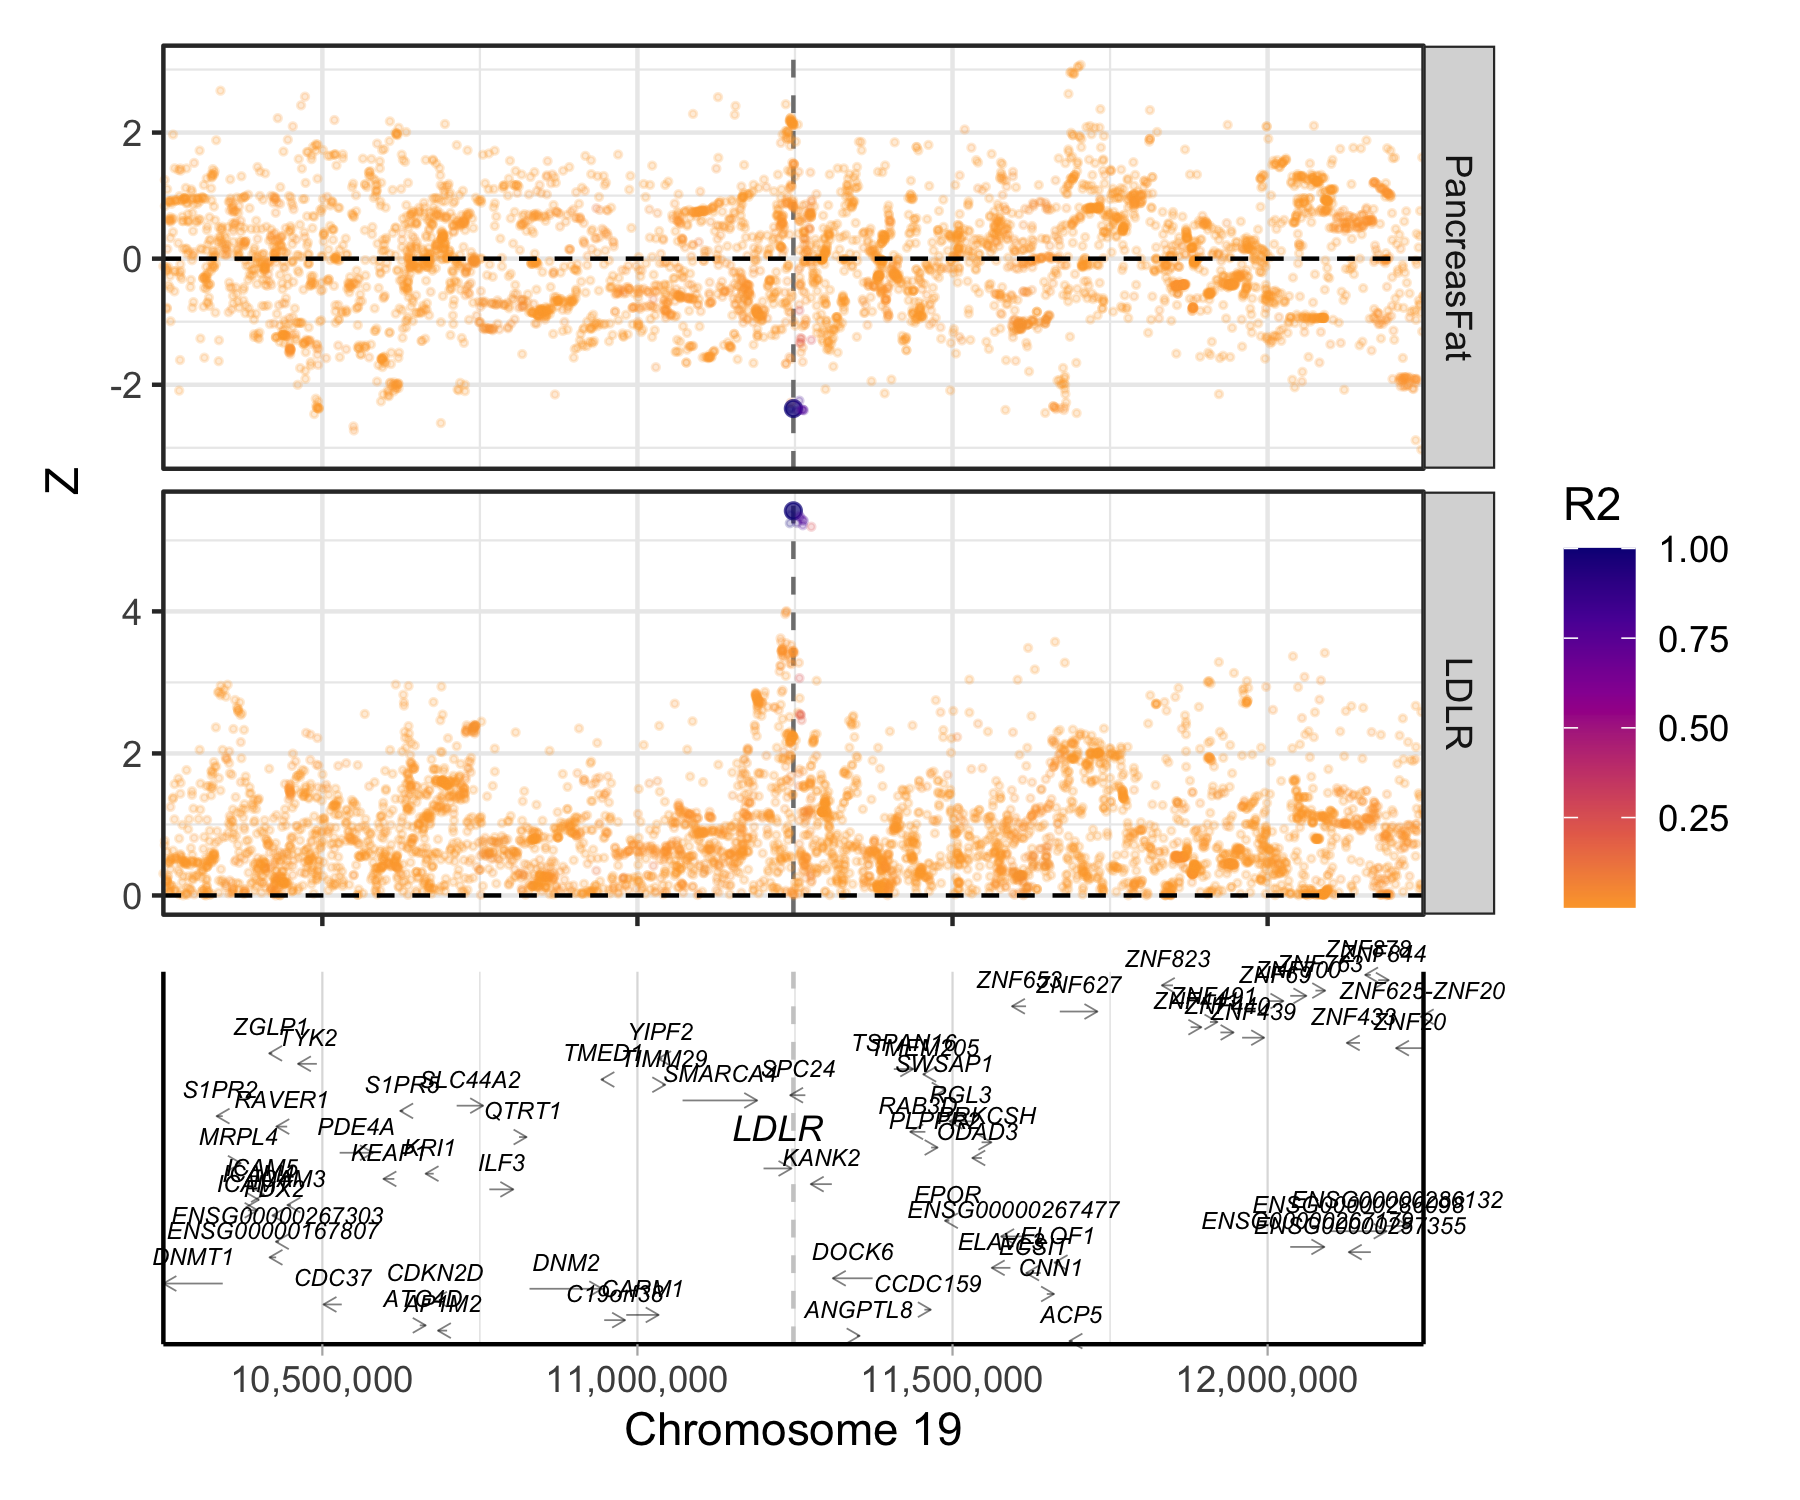

In [80]:
options(repr.plot.width = 6,repr.plot.height = 5)
test %>%
  mutate(
    lzp = pmap(
      list(CHROM, RES, gene_name, trait_name),
      ~locuszoomfx(..1, ..2, ..3, ..4)
    )
  ) %>%
  pluck('lzp', 1)